In [1]:
# Load data
df = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_processed.csv')
df$wonSet = as.factor(df$wonSet)
head(df)
library(dplyr)
data.frame(colSums(select_if(df, is.numeric)))

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,CU,NSULA,17,True,True,5,18,4,0,1,0,1,15,2
2,170825 CU vs NSULA 3-1s2,CU,NSULA,17,False,True,8,19,2,0,4,2,1,13,5
3,170825 CU vs NSULA 3-1s3,CU,NSULA,17,True,True,7,16,3,0,4,0,1,13,2
4,170825 CU vs NSULA 3-1s4,CU,NSULA,17,True,True,3,19,0,1,2,0,1,12,6
5,170916 CU @ CO St 3-2s1,CU,CO St,17,False,True,8,17,6,0,2,0,0,16,1
6,170916 CU @ CO St 3-2s2,CU,CO St,17,False,True,6,22,3,0,3,0,1,19,2



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,colSums.select_if.df..is.numeric..
,<dbl>
unforcedErrs,3337
earnedPts,11363
serveErr,1197
setErr,185
attackErr,1862
freeballErr,93
ace,781
kill,8878
stuffBlock,1704


In [2]:
# Fit initial glm for sanity check
glm1 = glm(wonSet ~ unforcedErrs + earnedPts, df, family="binomial")
summary(glm1)


Call:
glm(formula = wonSet ~ unforcedErrs + earnedPts, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.85417    0.53197  -9.125  < 2e-16 ***
unforcedErrs -0.26372    0.04481  -5.886 3.96e-09 ***
earnedPts     0.38702    0.03219  12.025  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 687.19  on 684  degrees of freedom
AIC: 693.19

Number of Fisher Scoring iterations: 5


In [3]:
df[482,]
# 14 additional points scored above typical (32-30 sets, rows 482, 497)

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
482,180930 CU @ WA St 1-3s2,CU,WA St,18,False,False,7,29,5,0,2,0,3,22,4


In [4]:
err_conf = -rev(confint(glm1, 'unforcedErrs'))
earned_conf = confint(glm1, 'earnedPts')
print(err_conf)
print(earned_conf)

Waiting for profiling to be done...

Waiting for profiling to be done...



   97.5 %     2.5 % 
0.1774556 0.3533389 
    2.5 %    97.5 % 
0.3261506 0.4524663 


In [5]:
glm2 = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm2)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.74599    0.53910  -8.803  < 2e-16 ***
serveErr    -0.17999    0.07197  -2.501   0.0124 *  
setErr      -0.07121    0.17796  -0.400   0.6891    
attackErr   -0.31957    0.05931  -5.388 7.12e-08 ***
freeballErr -0.26115    0.25697  -1.016   0.3095    
ace          0.58156    0.09181   6.334 2.39e-10 ***
kill         0.34014    0.03561   9.552  < 2e-16 ***
stuffBlock   0.48018    0.06544   7.338 2.16e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 672.50  on 679  degrees of freedom
AIC: 688.5

Number of Fisher Scoring iterations: 5


In [ ]:
cor(df[,8:14])

,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill
earnedPts,1.00000000,0.10921189,-0.07720041,-0.04382837,0.05873375,0.37996080,0.86826446
serveErr,0.10921189,1.00000000,0.04514168,-0.06234777,-0.02930388,0.02349020,0.11121843
setErr,-0.07720041,0.04514168,1.00000000,0.01071206,0.03669935,0.03367661,-0.07147390
attackErr,-0.04382837,-0.06234777,0.01071206,1.00000000,0.04996972,-0.11032804,0.01131836
freeballErr,0.05873375,-0.02930388,0.03669935,0.04996972,1.00000000,0.05264786,0.08332046
ace,0.37996080,0.02349020,0.03367661,-0.11032804,0.05264786,1.00000000,0.09714938
kill,0.86826446,0.11121843,-0.07147390,0.01131836,0.08332046,0.09714938,1.00000000


In [ ]:
glm_sq_simple = glm(wonSet ~ unforcedErrs + I(unforcedErrs^2) + earnedPts + I(earnedPts^2), df, family="binomial")
summary(glm_sq_simple)


Call:
glm(formula = wonSet ~ unforcedErrs + I(unforcedErrs^2) + earnedPts + 
    I(earnedPts^2), family = "binomial", data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.179833   2.030382  -6.491 8.51e-11 ***
unforcedErrs       -0.626854   0.172168  -3.641 0.000272 ***
I(unforcedErrs^2)   0.032148   0.015023   2.140 0.032365 *  
earnedPts           1.506047   0.235902   6.384 1.72e-10 ***
I(earnedPts^2)     -0.033012   0.006621  -4.986 6.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 660.81  on 682  degrees of freedom
AIC: 670.81

Number of Fisher Scoring iterations: 6


In [ ]:
glm3 = glm(wonSet ~ serveErr + setErr + attackErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm3)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + ace + 
    kill + stuffBlock, family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.72426    0.53742  -8.791  < 2e-16 ***
serveErr    -0.17804    0.07188  -2.477   0.0132 *  
setErr      -0.07611    0.17805  -0.427   0.6690    
attackErr   -0.32170    0.05914  -5.440 5.33e-08 ***
ace          0.57453    0.09120   6.300 2.98e-10 ***
kill         0.33628    0.03528   9.531  < 2e-16 ***
stuffBlock   0.48227    0.06537   7.378 1.61e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 673.51  on 680  degrees of freedom
AIC: 687.51

Number of Fisher Scoring iterations: 5


In [ ]:
glm4 = glm(wonSet ~ serveErr + attackErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm4)


Call:
glm(formula = wonSet ~ serveErr + attackErr + ace + kill + stuffBlock, 
    family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.75076    0.53404  -8.896  < 2e-16 ***
serveErr    -0.17974    0.07172  -2.506   0.0122 *  
attackErr   -0.32199    0.05911  -5.447 5.12e-08 ***
ace          0.57195    0.09088   6.293 3.11e-10 ***
kill         0.33702    0.03526   9.559  < 2e-16 ***
stuffBlock   0.48355    0.06526   7.409 1.27e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 673.70  on 681  degrees of freedom
AIC: 685.7

Number of Fisher Scoring iterations: 5


In [ ]:
glm_sq_full  = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock +
  I(serveErr^2) + I(setErr^2) + I(attackErr^2) + I(freeballErr^2) + I(ace^2) + I(kill^2) + I(stuffBlock^2), df, family="binomial")
summary(glm_sq_full)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock + I(serveErr^2) + I(setErr^2) + I(attackErr^2) + 
    I(freeballErr^2) + I(ace^2) + I(kill^2) + I(stuffBlock^2), 
    family = "binomial", data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -10.947867   1.545280  -7.085 1.39e-12 ***
serveErr          -0.049554   0.208802  -0.237  0.81240    
setErr            -0.399707   0.457385  -0.874  0.38217    
attackErr         -0.892036   0.192222  -4.641 3.47e-06 ***
freeballErr       -0.806100   0.755255  -1.067  0.28583    
ace                0.874824   0.221284   3.953 7.70e-05 ***
kill               1.419057   0.221014   6.421 1.36e-10 ***
stuffBlock         0.223820   0.207631   1.078  0.28105    
I(serveErr^2)     -0.028737   0.042456  -0.677  0.49849    
I(setErr^2)        0.199508   0.261051   0.764  0.44472    
I(attackErr^2)     0.082847   0.026767   3.095  0.00197 ** 
I(freeball

In [ ]:
# CU Dataset Setup
library(dplyr)
CU = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_CU.csv')
CU$wonSet = as.factor(CU$wonSet)
head(CU)
CU_X = CU %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonSet, -wonMatch, -season, -teamName)
CU_Y = CU %>% select(wonSet)
CU_train = data.frame(CU_X, CU_Y)
head(CU_train)

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,CU,NSULA,17,True,True,5,18,4,0,1,0,1,15,2
2,170825 CU vs NSULA 3-1s2,CU,NSULA,17,False,True,8,19,2,0,4,2,1,13,5
3,170825 CU vs NSULA 3-1s3,CU,NSULA,17,True,True,7,16,3,0,4,0,1,13,2
4,170825 CU vs NSULA 3-1s4,CU,NSULA,17,True,True,3,19,0,1,2,0,1,12,6
5,170916 CU @ CO St 3-2s1,CU,CO St,17,False,True,8,17,6,0,2,0,0,16,1
6,170916 CU @ CO St 3-2s2,CU,CO St,17,False,True,6,22,3,0,3,0,1,19,2


,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock,wonSet
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,4,0,1,0,1,15,2,True
2,2,0,4,2,1,13,5,False
3,3,0,4,0,1,13,2,True
4,0,1,2,0,1,12,6,True
5,6,0,2,0,0,16,1,False
6,3,0,3,0,1,19,2,False


In [ ]:
# bestglm for CU:
install.packages("bestglm")
library(bestglm)

CU_best = bestglm(CU_train, family=binomial)
summary(CU_best)
summary(CU_best$BestModel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘leaps’, ‘glmnet’, ‘grpreg’, ‘pls’


Loading required package: leaps

Morgan-Tatar search since family is non-gaussian.



Fitting algorithm:  BIC-glm
Best Model:
            df deviance
Null Model 682 680.0973
Full Model 686 943.2797

	likelihood-ratio test - GLM

data:  H0: Null Model vs. H1: Best Fit BIC-glm
X = 263.18, df = 4, p-value < 2.2e-16




Call:
glm(formula = y ~ ., family = family, data = Xi, weights = weights)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.96168    0.53070  -9.349  < 2e-16 ***
attackErr   -0.30900    0.05840  -5.291 1.22e-07 ***
ace          0.57116    0.09086   6.286 3.25e-10 ***
kill         0.32734    0.03476   9.417  < 2e-16 ***
stuffBlock   0.47524    0.06465   7.351 1.97e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 680.10  on 682  degrees of freedom
AIC: 690.1

Number of Fisher Scoring iterations: 5


In [ ]:
# Opposing teams:
opp = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_opp.csv')
head(opp)
opp$wonSet = as.factor(opp$wonSet)
opp_X = opp %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonSet, -wonMatch, -season, -teamName)
opp_Y = opp %>% select(wonSet)
opp_train = data.frame(opp_X, opp_Y)
head(opp_train)

opp_best = bestglm(opp_train, family=binomial)
summary(opp_best)
summary(opp_best$BestModel)
590/

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,NSULA,CU,17,False,False,7,9,0,0,6,1,1,8,0
2,170825 CU vs NSULA 3-1s2,NSULA,CU,17,True,False,7,20,1,2,4,0,0,16,4
3,170825 CU vs NSULA 3-1s3,NSULA,CU,17,False,False,9,10,4,0,5,0,2,8,0
4,170825 CU vs NSULA 3-1s4,NSULA,CU,17,False,False,6,12,3,0,3,0,1,11,0
5,170916 CU @ CO St 3-2s1,CO St,CU,17,True,False,4,17,0,0,4,0,3,12,2
6,170916 CU @ CO St 3-2s2,CO St,CU,17,True,False,1,19,1,0,0,0,3,13,3


ERROR: Error in opp %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, : could not find function "%>%"


In [ ]:
# Stanford
stan = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_Stan.csv')
head(stan)
stan$wonSet = as.factor(stan$wonSet)
stan_X = stan %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonSet, -wonMatch, -season, -teamName)
stan_Y = stan %>% select(wonSet)
stan_train = data.frame(stan_X, stan_Y)
head(stan_train)
dim(stan)
stan_best = bestglm(stan_train, family=binomial)
summary(stan_best)
summary(stan_best$BestModel)

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170924 CU vs Stan 2-3s1,Stan,CU,17,False,True,9,12,3,0,6,0,1,9,2
2,170924 CU vs Stan 2-3s2,Stan,CU,17,True,True,7,20,2,1,4,0,2,16,2
3,170924 CU vs Stan 2-3s3,Stan,CU,17,False,True,2,22,0,0,2,0,0,19,3
4,170924 CU vs Stan 2-3s4,Stan,CU,17,True,True,10,22,3,2,5,0,0,14,8
5,170924 CU vs Stan 2-3s5,Stan,CU,17,True,True,3,14,1,0,2,0,0,14,0
6,211017 CU @ Stan 0-3s1,Stan,CU,21,True,True,5,22,4,0,1,0,1,18,3


,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock,wonSet
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,3,0,6,0,1,9,2,False
2,2,1,4,0,2,16,2,True
3,0,0,2,0,0,19,3,False
4,3,2,5,0,0,14,8,True
5,1,0,2,0,0,14,0,True
6,4,0,1,0,1,18,3,True


[1] 33 15

Morgan-Tatar search since family is non-gaussian.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit

Fitting algorithm:  BIC-glm
Best model is null model!



Call:
glm(formula = y ~ 1, family = family, weights = weights)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5041     0.4513   3.333 0.000861 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 31.293  on 32  degrees of freedom
Residual deviance: 31.293  on 32  degrees of freedom
AIC: 33.293

Number of Fisher Scoring iterations: 4


In [ ]:
cu_all = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, CU, family="binomial")
opp_all = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, opp, family="binomial")
#stan_all = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, stan, family="binomial")
summary(cu_all)
summary(opp_all)
#summary(stan_all)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = CU)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.74599    0.53910  -8.803  < 2e-16 ***
serveErr    -0.17999    0.07197  -2.501   0.0124 *  
setErr      -0.07121    0.17796  -0.400   0.6891    
attackErr   -0.31957    0.05931  -5.388 7.12e-08 ***
freeballErr -0.26115    0.25697  -1.016   0.3095    
ace          0.58156    0.09181   6.334 2.39e-10 ***
kill         0.34014    0.03561   9.552  < 2e-16 ***
stuffBlock   0.48018    0.06544   7.338 2.16e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 672.50  on 679  degrees of freedom
AIC: 688.5

Number of Fisher Scoring iterations: 5



Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = opp)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.46377    0.68390  -9.451  < 2e-16 ***
serveErr    -0.24568    0.07399  -3.320 0.000899 ***
setErr      -0.23758    0.15059  -1.578 0.114632    
attackErr   -0.29532    0.06405  -4.610 4.02e-06 ***
freeballErr -0.58015    0.29269  -1.982 0.047468 *  
ace          0.69642    0.09538   7.302 2.84e-13 ***
kill         0.41646    0.04062  10.252  < 2e-16 ***
stuffBlock   0.55175    0.07264   7.595 3.07e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 584.00  on 679  degrees of freedom
AIC: 600

Number of Fisher Scoring iterations: 5


In [ ]:
summary(glm(wonSet ~ unforcedErrs + earnedPts, stan, family = "binomial"))


Call:
glm(formula = wonSet ~ unforcedErrs + earnedPts, family = "binomial", 
    data = stan)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   -1.1222     3.0156  -0.372    0.710
unforcedErrs  -0.1111     0.1864  -0.596    0.551
earnedPts      0.1643     0.1413   1.163    0.245

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 31.293  on 32  degrees of freedom
Residual deviance: 29.555  on 30  degrees of freedom
AIC: 35.555

Number of Fisher Scoring iterations: 4


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "serveErr"    "setErr"      "attackErr"   "freeballErr" "ace"        
[6] "kill"        "stuffBlock"

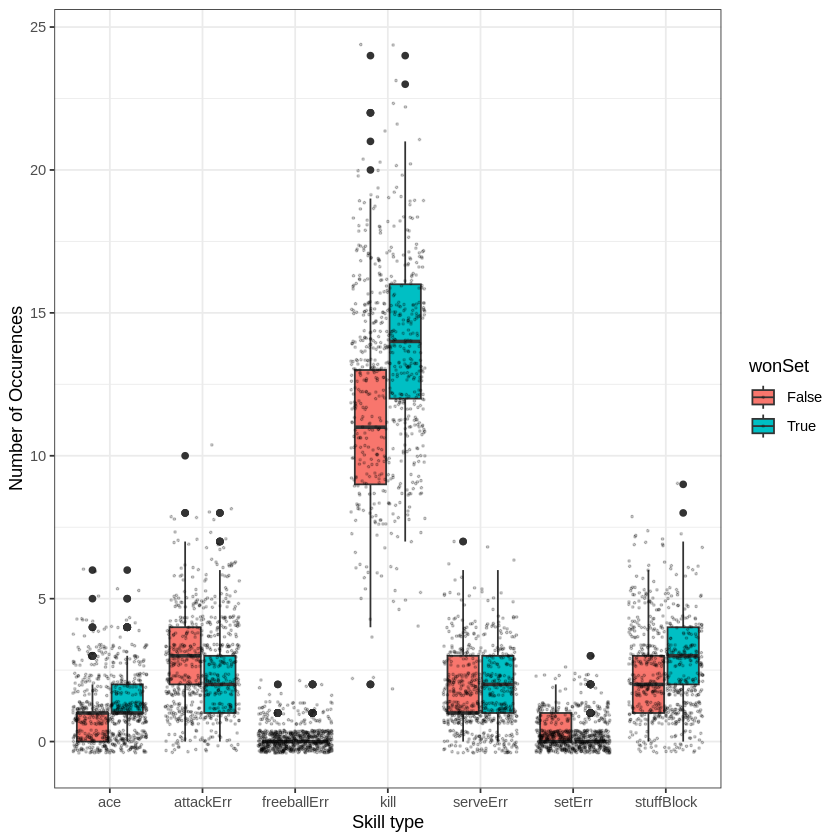

In [ ]:
install.packages("tidyverse")
library(tidyverse)

colnames(CU_X)

CU_long = CU_train %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
ggplot(CU_long, aes(x = Type, y = Count, fill = wonSet)) + geom_boxplot() + geom_jitter(size = .4, alpha=.2) + theme_bw() + xlab("Skill type") + ylab("Number of Occurences")

In [ ]:
ggplot() + geom_col(data = CU_long, aes(x = Type, y = Count)) +  theme_bw

ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `theme_bw` to a [34m<ggplot>[39m object
[36mℹ[39m Did you forget to add parentheses, as in `theme_bw()`?


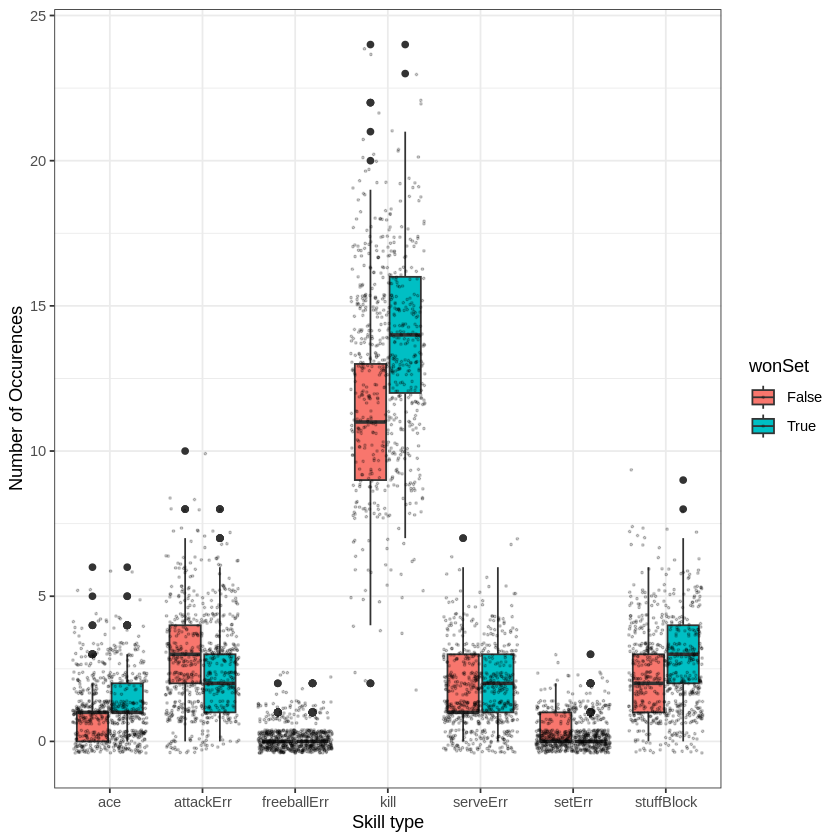

In [ ]:
ggplot(CU_long, aes(x = Type, y = Count, fill = wonSet)) + geom_boxplot() + geom_jitter(size = .4, alpha=.2) + theme_bw() + xlab("Skill type") + ylab("Number of Occurences")

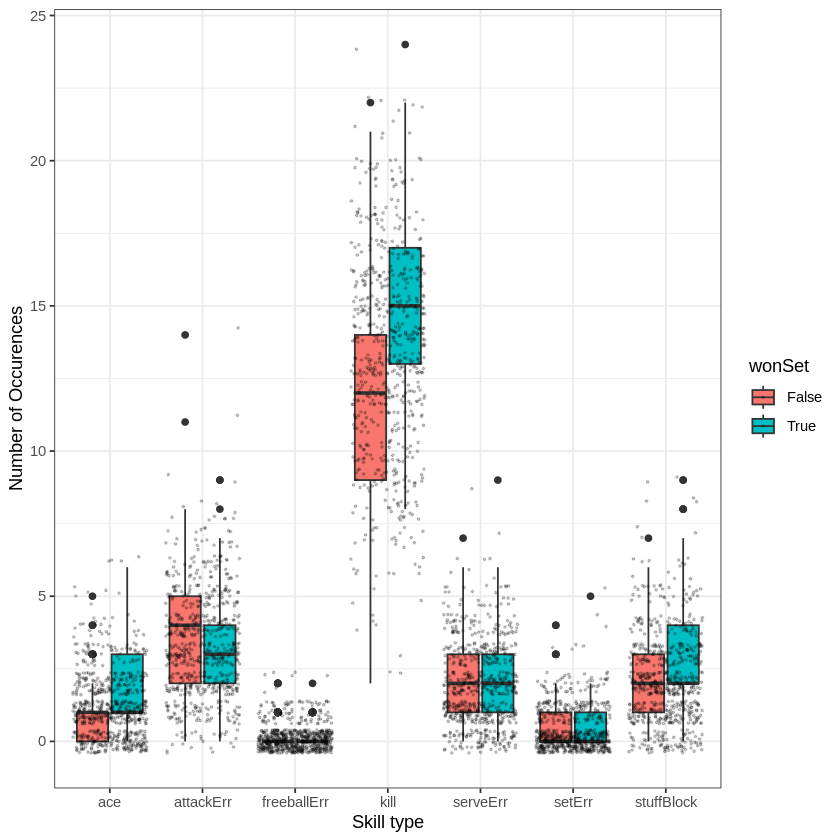

In [ ]:
opp_long = opp_train %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
ggplot(opp_long, aes(x = Type, y = Count, fill = wonSet)) + geom_boxplot() + geom_jitter(size = .4, alpha=.2) + theme_bw() + xlab("Skill type") + ylab("Number of Occurences")

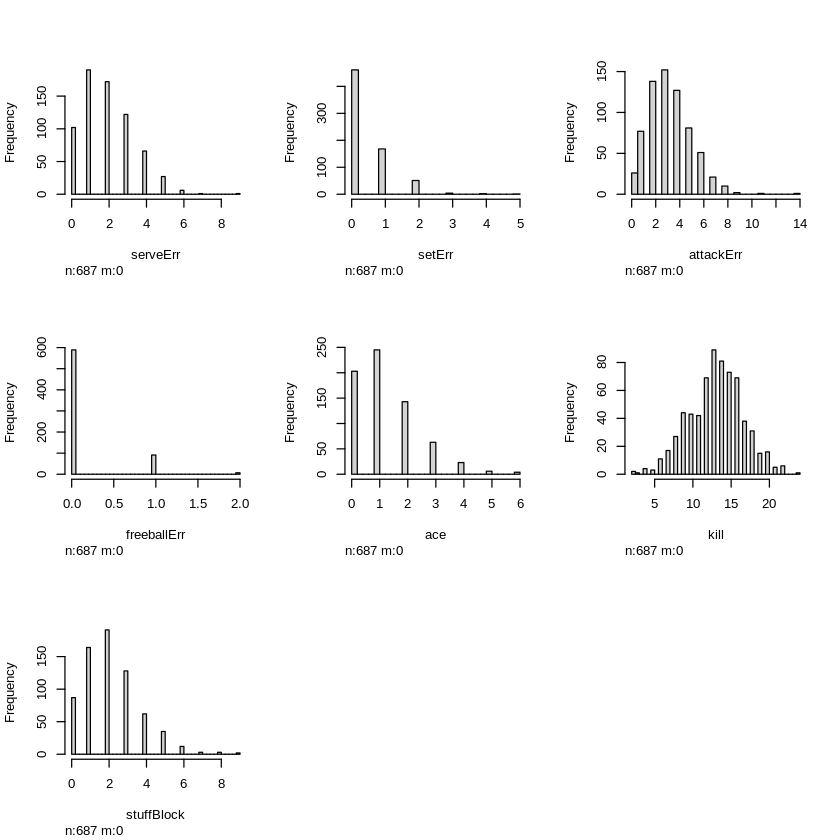

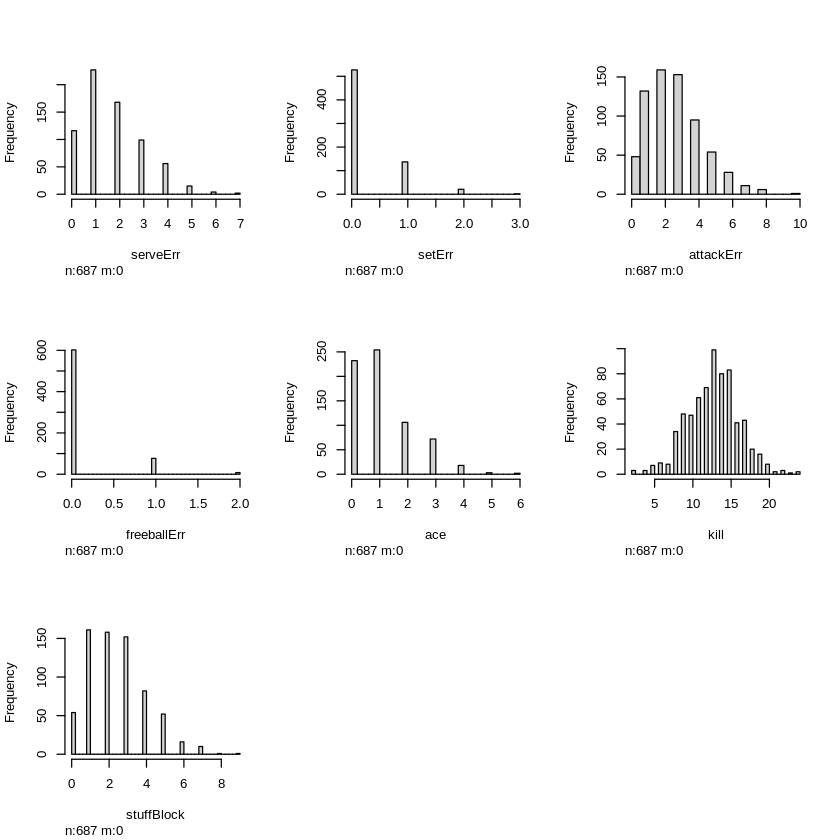

In [ ]:
#install.packages("Hmisc")
library(Hmisc)

hist.data.frame(opp_X)
hist.data.frame(CU_X)